<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here are the imports for the following exercise sheet.

In [1]:
import networkx as nx
from random import sample
from random import choice
import matplotlib.pyplot as plt
import numpy as np
import collections
import networkx.algorithms.community as community

Here we create the graph.

In [2]:
filenameFacebook = "/content/facebook/414.edges"

In [3]:
graphFacebook = nx.Graph()

with open(filenameFacebook) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphFacebook.nodes):
            graphFacebook.add_node(a)
        if b not in list(graphFacebook.nodes):
            graphFacebook.add_node(b)

        graphFacebook.add_edge(a, b)

Here are the same functions used in Assignment 5 to get the color map of the nodes, the edges between and inside communities and finally plot the network.

In [4]:
def get_color_map(nodeGroups, G):
  listOfColors = []

  for i in range(len(nodeGroups)-1):
    listOfColors.append(list(np.random.choice(range(255),size=3)))

  for i in range(len(listOfColors)):
    for j in range(3):
      listOfColors[i][j] = listOfColors[i][j] /255

  listOfColors.append([0, 0, 0])
  colorMap = []

  for node in G:
    for i in range(len(nodeGroups)):
      if node in nodeGroups[i]:
        colorMap.append(listOfColors[i])
  
  return colorMap

In [5]:
def get_community_edges(nodeGroups, G):
  external = []
  internal = []

  for i in range(len(nodeGroups)):
    for node_in in nodeGroups[i]:
      for node_ex in G.nodes:
        if G.has_edge(node_in, node_ex) == True:
          if node_ex in nodeGroups[i]:
            if (node_in, node_ex) not in internal and (node_ex, node_in) not in internal:
              internal.append((node_in, node_ex))
          else:
            if (node_in, node_ex) not in external and (node_ex, node_in) not in external:
              external.append((node_in, node_ex))

  return external, internal

In [6]:
def draw_plot_networkx(G, color_map, external, internal, name):
  plt.figure(figsize = (20, 20))
  graph_pos = nx.spring_layout(G)
  ax = plt.gca()
  ax.set_title(name)
  nx.draw_networkx(G, node_size=0, edgelist=external, pos=graph_pos, edge_color="silver", with_labels = False, ax=ax)
  nx.draw_networkx(G, node_color=color_map, edgelist=internal, pos=graph_pos, edge_color="black", with_labels = True, ax=ax)

# Question (a)

We create 2 sets which 50 nodes each. Those sets are disjoint and the nodes were picked at random. After that we compute the cut size and the conductance between this 2 sets. 

At the end, we try to plot the network. The same colored nodes belong to the same set and the black nodes are neither in set 1, nor set 2. The edges between different communities are grey and the ones inside communities are black.

In [7]:
set1 = sample(list(graphFacebook), 50)
set2 = []
while len(set2) < 50:
  newNode = choice(list(graphFacebook))
  if newNode not in set1:
    set2.append(newNode)

In [8]:
print("Let set T contain this following nodes:", set1, "\nand the set S contain this following nodes:", set2,
      ".\nThe cut size between S and T in the Facebook network is", nx.cut_size(graphFacebook, set1, set2), 
      "and its conductance is", nx.conductance(graphFacebook, set1, set2))

Let set T contain this following nodes: [592, 480, 670, 583, 671, 619, 635, 641, 575, 632, 591, 563, 626, 173, 623, 515, 651, 616, 653, 596, 514, 595, 584, 391, 378, 617, 465, 427, 500, 634, 657, 567, 542, 577, 578, 553, 606, 434, 667, 658, 576, 506, 628, 682, 633, 395, 601, 513, 394, 666] 
and the set S contain this following nodes: [612, 586, 665, 436, 461, 648, 107, 431, 544, 663, 678, 684, 665, 524, 637, 631, 612, 662, 676, 659, 676, 582, 663, 34, 639, 438, 586, 558, 436, 492, 370, 683, 556, 438, 609, 644, 650, 673, 646, 648, 665, 649, 675, 620, 614, 573, 677, 593, 648, 662] .
The cut size between S and T in the Facebook network is 283 and its conductance is 0.2774509803921569


In [9]:
set3 = []
for node in list(graphFacebook.nodes()):
  if node not in set1 and node not in set2:
    set3.append(node)

In [10]:
nodeGroups = []
nodeGroups.append(set1)
nodeGroups.append(set2)
nodeGroups.append(set3)

In [11]:
external = get_community_edges(nodeGroups, graphFacebook)[0]
internal = get_community_edges(nodeGroups, graphFacebook)[1]

In [12]:
colorMap = get_color_map(nodeGroups, graphFacebook)

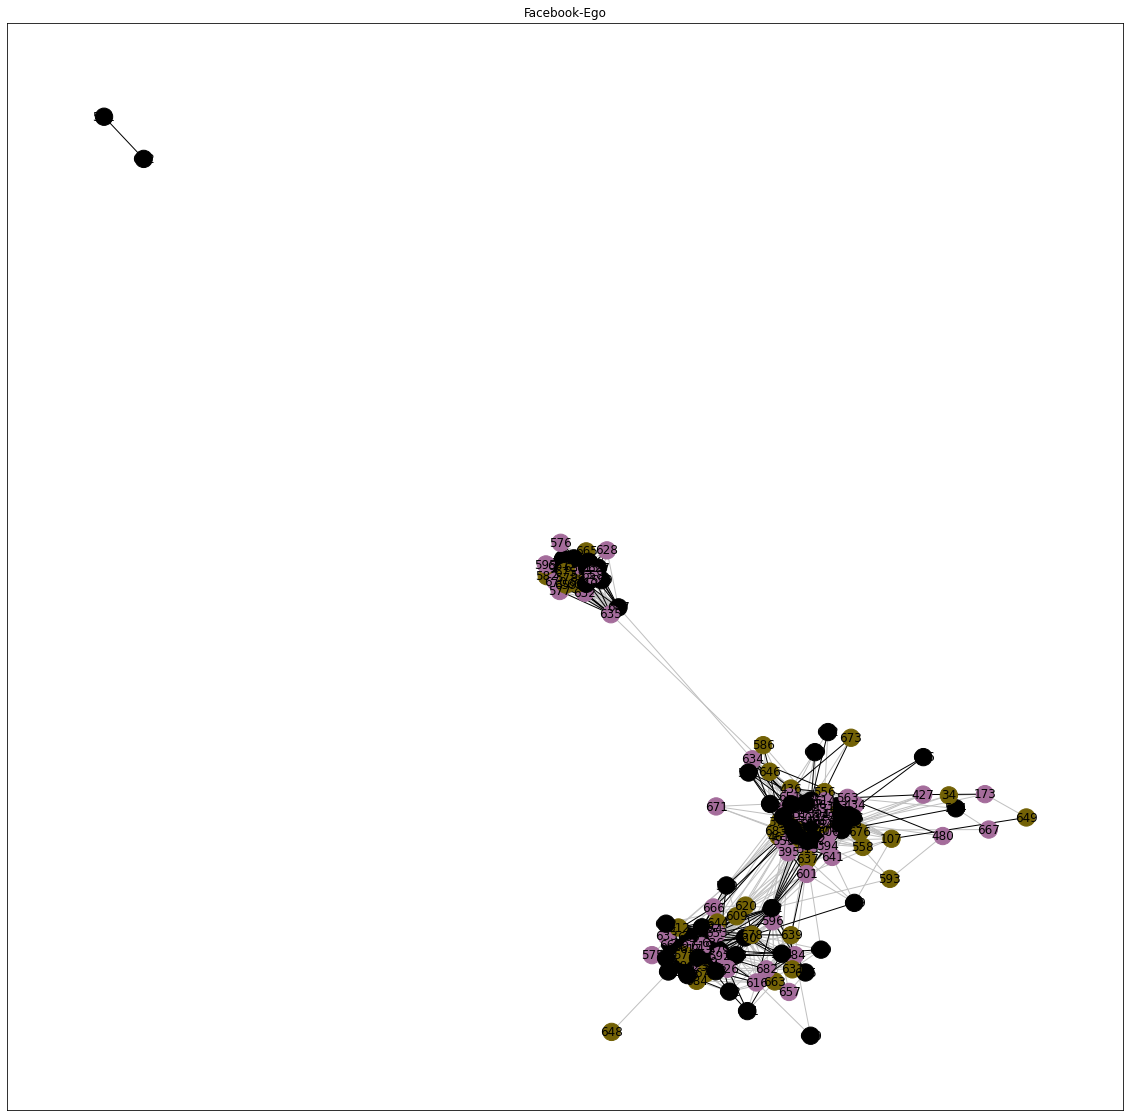

In [13]:
draw_plot_networkx(graphFacebook, colorMap, external, internal, "Facebook-Ego")

# Question (b)

Using the same algorithm, we get again 2 disjoint sets. We can calculate the cut size and the conductance. At the end we plot the network following the same explanations as before.

In [14]:
set4 = sample(list(graphFacebook), 50)
set5 = []
while len(set5) < 50:
  newNode = choice(list(graphFacebook))
  if newNode not in set4:
    set5.append(newNode)

In [15]:
print("Let set T contain this following nodes:", set4, "\nand the set S contain this following nodes:", set5,
      ".\nThe cut size between S and T in the Facebook network is", nx.cut_size(graphFacebook, set4, set5), 
      "and its conductance is", nx.conductance(graphFacebook, set4, set5))

Let set T contain this following nodes: [580, 675, 667, 598, 579, 646, 650, 631, 683, 600, 610, 107, 515, 480, 682, 621, 673, 465, 563, 591, 611, 593, 574, 684, 642, 581, 578, 664, 412, 514, 644, 641, 576, 637, 618, 616, 553, 678, 583, 659, 677, 647, 605, 492, 619, 630, 649, 370, 588, 559] 
and the set S contain this following nodes: [500, 431, 561, 561, 513, 639, 596, 672, 654, 662, 592, 586, 394, 645, 376, 374, 635, 656, 590, 627, 661, 566, 685, 561, 34, 461, 662, 596, 483, 676, 475, 400, 376, 653, 422, 658, 428, 601, 617, 657, 391, 620, 461, 378, 566, 626, 373, 628, 620, 672] .
The cut size between S and T in the Facebook network is 346 and its conductance is 0.3295238095238095


In [16]:
set6 = []
for node in list(graphFacebook.nodes()):
  if node not in set4 and node not in set5:
    set6.append(node)

In [17]:
newNodeGroups = []
newNodeGroups.append(set4)
newNodeGroups.append(set5)
newNodeGroups.append(set6)

In [18]:
newExternal = get_community_edges(newNodeGroups, graphFacebook)[0]
newInternal = get_community_edges(newNodeGroups, graphFacebook)[1]

In [19]:
colorMap = get_color_map(newNodeGroups, graphFacebook)

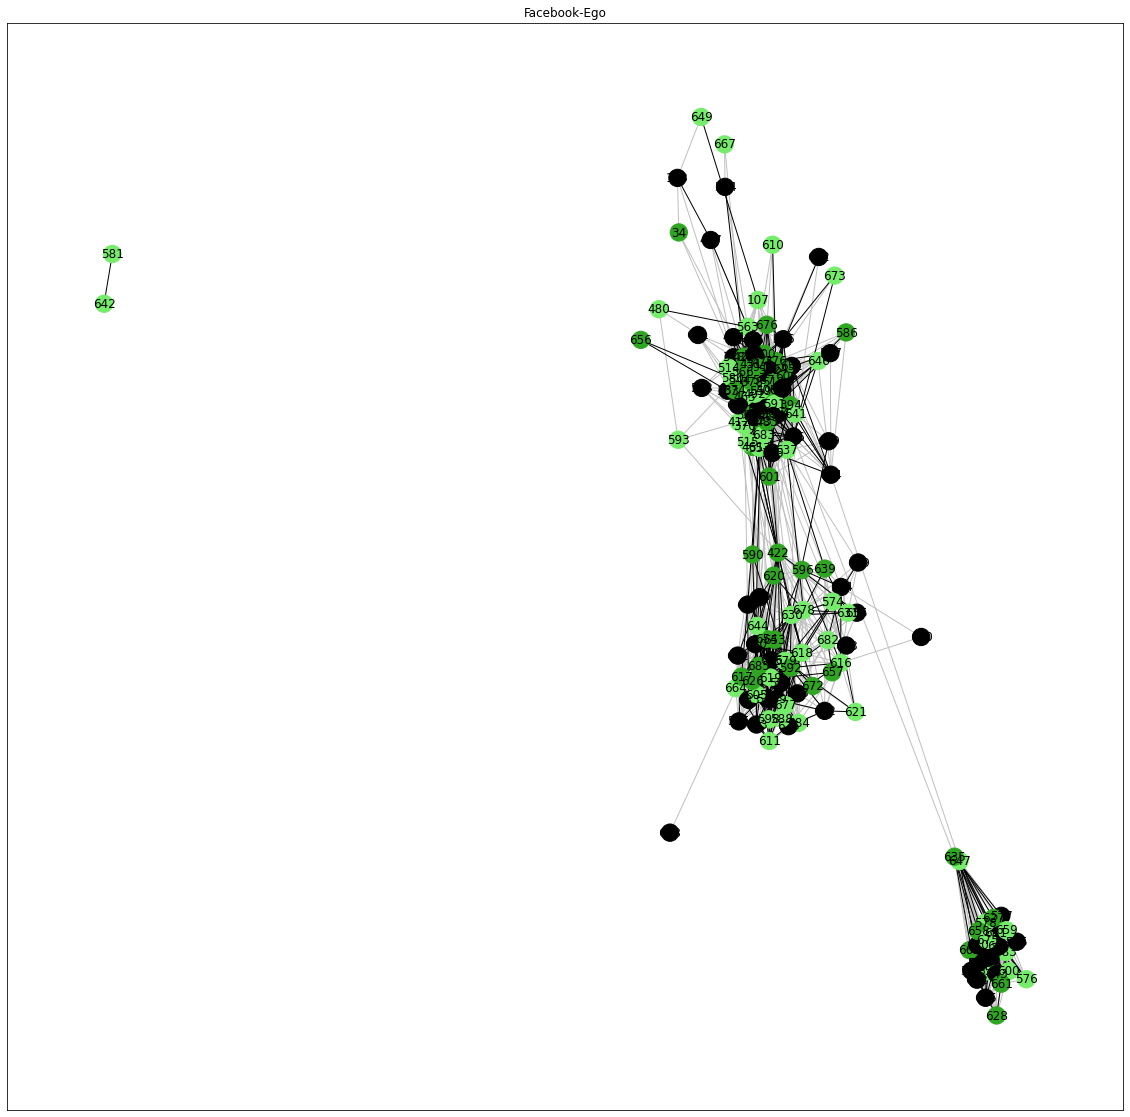

In [20]:
draw_plot_networkx(graphFacebook, colorMap, external, internal, "Facebook-Ego")

By picking nodes at random for each disjoint set, the cut size can vary from the minimal cut number to a very high number. This can mean that we are separating nodes which should be in the same community since we are cutting a large number of edges. Hence we can conclude that putting randomly nodes to be in the same community is not the best idea. 

# Question (c)

We create a list of the nodes in Facebook network in a ascending way. After that, we calculate the Laplacien matrix which each row i correponds to the node at i position in the previous list.

In [21]:
orderedListOfNodes = sorted(list(graphFacebook.nodes()), reverse=False)

In [22]:
laplacianMatrixFacebook = nx.laplacian_matrix(graphFacebook, nodelist = orderedListOfNodes).todense()

print("The Laplacian matrix of the Facebook-Ego is\n",laplacianMatrixFacebook)

The Laplacian matrix of the Facebook-Ego is
 [[ 3  0 -1 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [-1  0  4 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 16]]


# Question (d)

For each node, we find the size of the largest clique which it belongs to. We created a list with only the values of the sizes of the cliques and sorted it. We get the last value from that list since it is the biggest. Then we just print the list of cliques from different size. We start from the biggest size clique we can have on the Facebook ego until 2-cliques. 

In [23]:
maxCliquePerNode = nx.node_clique_number(graphFacebook)

In [25]:
values = []

for i in maxCliquePerNode:
  values.append(maxCliquePerNode[i])

values.sort()

print("The max size of a clique in network is", values[-1])

The max size of a clique in network is 18


In [29]:
for i in range(values[-1], 1, -1):
  graphClique = community.k_clique_communities(graphFacebook, i)
  print("The list of", i, "cliques of the Facebook-Ego is", list(graphClique))

The list of 18 cliques of the Facebook-Ego is [frozenset({640, 577, 578, 643, 582, 583, 658, 659, 595, 661, 662, 599, 600, 670, 675, 615, 681, 627, 632, 635})]
The list of 17 cliques of the Facebook-Ego is [frozenset({640, 643, 650, 658, 659, 661, 662, 670, 675, 681, 577, 578, 582, 583, 595, 599, 600, 615, 627, 632, 635}), frozenset({513, 514, 391, 524, 475, 348, 544, 483, 553, 492, 559, 561, 506, 373, 566, 374, 376, 378}), frozenset({514, 524, 461, 475, 348, 544, 483, 553, 363, 492, 378, 559, 561, 370, 373, 374, 566, 376, 506})]
The list of 16 cliques of the Facebook-Ego is [frozenset({640, 643, 650, 658, 659, 661, 662, 670, 675, 681, 577, 578, 582, 583, 595, 599, 600, 615, 627, 632, 635}), frozenset({513, 514, 391, 524, 400, 412, 542, 544, 423, 553, 428, 559, 431, 561, 436, 566, 438, 461, 591, 465, 475, 348, 606, 483, 363, 492, 378, 370, 373, 374, 376, 506})]
The list of 15 cliques of the Facebook-Ego is [frozenset({640, 643, 650, 658, 659, 661, 662, 665, 670, 675, 681, 577, 578, 582